## Overview and judging
This competition focuses on working with the classic MNIST digit recognizer dataset and gives us a plethora of options whether we want to use classical machine learning approaches like PCA or t-SNE for data visualization and Support Vector Machines for classification purposes or use more contemporary deep learning approaches like Convolutional Neural Networks (CNNs) in order to classify which digits belong to each.

Given the recent advances in deep learning, I'd prefer to go with a deep learning approach that will let me make use of newer models more suited to this purpose.  If I were in industry working on a problem like this, this would definitely be a discussion point for me and the team before going any further. Unless something like this is more chef's choice, which I don't know for certain. Any help in this area would be very much appreciated.

## Simple model or transfer learning?
One of the next big choices I have in this arena is whether I want to write the model from scratch or if I'd prefer to make use of transfer learning to make my job easier. For this problem, going through a simple model like the one used in the ["Machine Learning Scientist with Python" track from datacamp](https://learn.datacamp.com/career-tracks/machine-learning-scientist-with-python) would make much more sense to me since the scale of the problem isn't that advanced. If it were, I'd consider the ResNet50 or BERT of deep learning for this problem to help increase the chances of success for the project within the desired timeline. Of course also working with the team to ensure this is the right decision overall as I'd hate to let my own naivety get in the way of successful client outcomes.

Based on the experience with the datacamp track, in particular the ["Image Processing with Keras" class](https://learn.datacamp.com/courses/image-processing-with-keras-in-python) taught by Ariel Rokem, a senior data scientist with the University of Washington, I'd feel comfortable working through this problem in such a way. On another note, if you get a chance to follow Ariel's work, I'd highly recommend it.

I could sense the knowledge Ariel had and having a true conversation about his work would be an absolute delight, especially for a geek like myself.  Without drudging on much longer, let's get moving!

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
image_data = train.loc[:, 'pixel0':'pixel783']

In [6]:
image_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Defining the structure of the neural network
Now I have to stretch my legs a bit and remember the differences in Input Layers between the 3 APIs taught as part of the "Machine Learning Scientist with Python" track on datacamp. As part of this track, we explored:
1. Keras sequential API,
2. Keras functional API,
3. Tensorflow estimator API

Reviewing number 1 from [this datacamp exercise](https://campus.datacamp.com/courses/image-processing-with-keras-in-python/image-processing-with-neural-networks?ex=8), the input shape needs to be the shape of a single sample from our train dataframe i.e. (input_shape(784,)). This will create 784 units in our input layer that will get fed to the next layer on deciding how to build this model.  

Throughout this notebook, I'm likely to reference [this kaggle notebook](https://www.kaggle.com/brendanartley/mnist-digit-recognizer-keras-cnn) to understand how I should build out my own model.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
train.isnull().any().sum()

0

In [10]:
test.isnull().any().sum()

0

One decision point worth pointing out immediately for the construction of the network is that the deeper this network is made, the more nuances of the photographs it will be able to capture and ultimately classify inside of the data. I'll be relying on my reference notebook as well as the datacamp exercises to help guide me through this full structure.

After reviewing the prior notebook and a [kaggle grandmaster notebook](https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial), I'm going to base my architecture highly on the latter with batch normalization thrown in so as not to run my tiny computer out of gas (If this becomes any more of a common refrain, it's probably time to spin up a vm in the cloud and run it there.) Here's a picture similar to the architecture I plan to use.

![Convolutional Neural Networks](gec2.jpg)

[This notebook though](https://www.kaggle.com/brendanartley/mnist-digit-recognizer-keras-cnn) adds batch normalization layers between the convolution and max-pooling so I'll do that here to scale down the outliers. Finally, I'll add a 2nd dropout layer between the 1st pooling layer and the 2nd convolutional layer to keep the network robust to dying pathways.

## Preprocessing the data
One thing I'll point out here that may seem backwards to some people is that in my experience with mathematical modeling we often took a completely theoretical approach to designing the model before deciding on the data we are going to collect. Either way it starts with a problem definition and the results it delivers the business, but CRISP-DM or ASUM-DM may not necessarily need to have the data prep stages come first. I'll bet it definitely helps though as both the model architecture and data used play into eachother to form a nice whole. 

Moving past the theoretical happenstance, let's get into data cleaning!

In [16]:
label = train.loc[:, 'label']

In [18]:
label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_val, y_train, y_val = train_test_split(image_data, label, test_size=.3, random_state=145)

After reviewing the number of elements in each class, I realized that its roughly a uniform distribution across all the values. I could build something to stratify the data, but that doesn't seem necessary here when I'm equally likely to get a sample from any of the 10 classes.

Now the images need reshaped because as shown above, a convolutional layer reads the image in as a multi-dimensional construct meanwhile a dense layer would read it in as a flattened vector which can be seen below:

![Flattened array input](flat-pool-map.jpg)

In [21]:
x_train = x_train / 255.0
x_val = x_val / 255.0

In [22]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_val = x_val.values.reshape(-1, 28, 28, 1)

In [23]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

## Building the model

Now that we've arrived through defining the model architecture and pre-processing the data, we can actually start building out the model.

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

With the multiple callbacks working together, we can afford to let EarlyStopping wait a bit longer before terminating so we know if we're stuck on a plateau inside of our loss function. Determining this can be troublesome, so let's give our algorithm a chance to find a global minimum before stopping it.

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='Same'))
model.add(MaxPool2D(2))
model.add(Dropout(.25))
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='Same'))
model.add(MaxPool2D(2))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Defining the data augmentation generator
Next, let's define a data augmentation generator to make our network more robust to variations in the images.

In [28]:
datagen = ImageDataGenerator(
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1)  # randomly shift images vertically 10%
datagen.fit(x_train)

## Defining various callbacks
Since neural networks can take longer to train, I'd like to make use of a combination of 3 different callbacks to ensure we obtain the best model fit possible during the training process:
1. EarlyStopping - This will allow training to be stopped after patience epochs if the monitored attribute is not performing better.
2. ModelCheckpoint - During each epoch, a callback will check if the fit inside the current epoch is better than what is available on disk. If so, it will write it out to an hdf5 file with the appropriate weights.
3. ReduceLROnPlateau - If we hit a plateau while minimizing the loss function, decrease the learning rate after patience rounds.

My intended usage would be to set EarlyStopping patience rounds high so ReduceLROnPlateau gets a chance to take effect before cutting this completely. Since we're utilizing ModelCheckpoint, we're still guaranteed to get the best model out of this bunch as long as EarlyStopping and ModelCheckpoint are monitoring the same metric.

In this section, I'm referencing the ["Introduction to Deep Learning with Keras" callback section](https://campus.datacamp.com/courses/introduction-to-deep-learning-with-keras/going-deeper-2?ex=13) from datacamp and this ["Intro to convolutional neural network" tutorial by kaggle grandmaster](https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial) as feedback into this section.

In [35]:
early_stopper = EarlyStopping(monitor='val_accuracy', patience=10)
model_check = ModelCheckpoint(filepath='best_model.hdf5', 
                              monitor='val_accuracy', 
                              save_best_only=True)
reduce_lr = ReduceLROnPlateau()

In [46]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=250), 
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopper, model_check, reduce_lr])

Epoch 1/50
118/118 [==============================] - 32s 270ms/step - loss: 0.0801 - accuracy: 0.9766 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 2/50
118/118 [==============================] - 20s 169ms/step - loss: 0.0808 - accuracy: 0.9742 - val_loss: 0.0342 - val_accuracy: 0.9890
Epoch 3/50
118/118 [==============================] - 19s 159ms/step - loss: 0.0746 - accuracy: 0.9777 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch 4/50
118/118 [==============================] - 19s 163ms/step - loss: 0.0791 - accuracy: 0.9754 - val_loss: 0.0364 - val_accuracy: 0.9884
Epoch 5/50
118/118 [==============================] - 19s 162ms/step - loss: 0.0765 - accuracy: 0.9764 - val_loss: 0.0354 - val_accuracy: 0.9894
Epoch 6/50
118/118 [==============================] - 19s 164ms/step - loss: 0.0771 - accuracy: 0.9758 - val_loss: 0.0323 - val_accuracy: 0.9892
Epoch 7/50
118/118 [==============================] - 19s 160ms/step - loss: 0.0771 - accuracy: 0.9757 - val_loss: 0.0344 - val_ac

## Model validation
Having trained the model now, let's take a look at our losses and accuracies to better understand how our model handled in this process.

In [47]:
import matplotlib.pyplot as plt

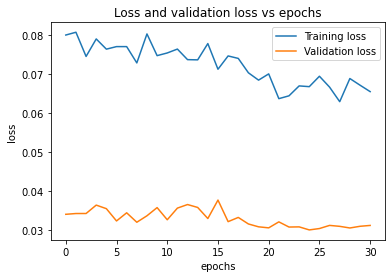

In [48]:
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss and validation loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

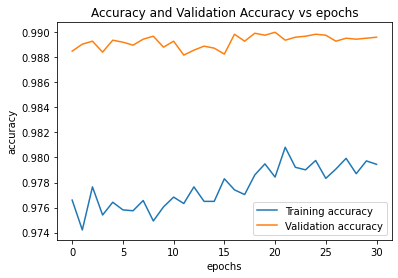

In [69]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy and Validation Accuracy vs epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

I don't like that my loss function has stayed consistently higher compared to my validation loss. I'm not sure if I got caught in a local minimum or if I'm hitting some other error like I am doing a dataflow gen on my training set but not on my validation set.

In [62]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [50]:
y_val_pred = model.predict(x_val)

In [60]:
y_pred_classes = np.argmax(y_val_pred, axis=1)

In [61]:
y_val_true = np.argmax(y_val, axis=1)

In [64]:
confusion_mtx = confusion_matrix(y_val_true, y_pred_classes)

<AxesSubplot:>

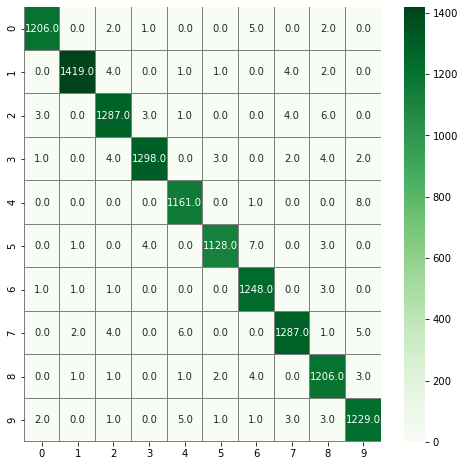

In [68]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, 
            annot=True, 
            linewidths=0.01,
            cmap='Greens',
            linecolor='gray',
            fmt='.1f',
            ax=ax)

Looking over both the graphs of losses and accuracies, this seems more like the image data generator did it's job in randomly messing with the image training data to force higher accuracy in the validation set overall. With this being the case, let's create a submission with our current model and then we can also load the best model from disk to give us a couple different submissions.

## Cleaning the testing data
With that trouble past, let's get the submission made and keep moving.

In [71]:
test = test / 255.0

In [72]:
test = test.values.reshape(-1, 28, 28, 1)

In [74]:
test_predictions = model.predict(test)

In [75]:
test_label_classes = np.argmax(test_predictions, axis=1)

In [76]:
test_label_classes

array([2, 0, 9, ..., 3, 9, 2])

In [78]:
submission_df = pd.DataFrame({'ImageId': np.arange(1, len(test_label_classes) + 1, 1), 'Label': test_label_classes})

In [79]:
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [80]:
submission_df.to_csv('submission.csv', index=False)

## Loading the best model
My first submission put me into about 820th out of 2,166 on a "Getting started" competition. At this level of the leader board, high 99-100% accuracy seems to be the standard. Let's see if I can modify use the best fit model from the training epochs and hope that can bump me up to around 580th place. Without doing a rote copy and paste of others work or finding a team to gear up with, this may be the best I can do for the moment. I can always look into more educational material like the tensorflow developer certificate though to see what more I can squeeze out of deep learning competitions.

In [82]:
from keras.models import load_model

In [83]:
new_model = load_model('best_model.hdf5')

In [84]:
new_model.evaluate(x_val, y_val)

394/394 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.9900


[0.030501071363687515, 0.9900000095367432]

Using the above validation accuracy shown in the output, I compared what was returned to me with what I have from the history callback object and this model seems to have come from epoch 15 where the validation accuracy is highest. Thus, I should have a good chance of getting an even better model if I submit predictions for this one.

In [85]:
best_model_pred = new_model.predict(test)

In [86]:
best_model_classes = np.argmax(best_model_pred, axis=1)

In [87]:
submission_df = pd.DataFrame({'ImageId': np.arange(1, len(best_model_classes) + 1, 1), 'Label': best_model_classes})

In [88]:
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [89]:
submission_df.to_csv('submission2.csv', index=False)

## End results
Unfortunately, the 2nd model submission did nothing to improve my overall score, so I'll leave it at this for now. 820 out of 2166 on a "Getting started" kaggle challenge doesn't seem too bad. Moving forward, though, I'm hoping that learning more and working with a team would allow me to eke out those few extra points.